<a href="https://colab.research.google.com/github/AshishKr2303/DiseaseWebApp/blob/master/Text_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
#import transformers

In [3]:
import os 
! apt-get update -qq > /dev/null    
# Install java 
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"] 
! pip install nlu 

E: Unsupported file /usr/lib/jvm/java-8-openjdk-amd64 given on commandline
E: Unsupported file /bin: given on commandline
     |████████████████████████████████| 455 kB 5.1 MB/s 
     |████████████████████████████████| 91 kB 9.9 MB/s 


In [5]:
df=pd.read_csv('/content/uniquestions_final2.csv')
df.head()

,Question1,Question2,Similarity
0,&nbsp;Medical reason(s): If any of the followi...,COE(s) Discussed (select all that apply):,0
1,(IADL) Are you experiencing any limitations to...,Co-morbidities (select all that apply):,0
2,"<P>Additional details regarding ""member refuse...","Compared to others your age, how would you des...",0
3,<P>Colorectal cancer screening status:&nbsp; </P>,Complications Risk:,0
4,<P>Do you take your blood pressure medication ...,CRS centers reviewed include the following :,0


In [6]:
df.drop(columns=['Question2','Similarity'],inplace=True,axis=1)
df.head()

,Question1
0,&nbsp;Medical reason(s): If any of the followi...
1,(IADL) Are you experiencing any limitations to...
2,"<P>Additional details regarding ""member refuse..."
3,<P>Colorectal cancer screening status:&nbsp; </P>
4,<P>Do you take your blood pressure medication ...


In [8]:
pip install pyspark==3.0.2

     |████████████████████████████████| 204.8 MB 56 kB/s 
     |████████████████████████████████| 198 kB 42.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.2-py2.py3-none-any.whl size=205186690 sha256=b73d5da851bf24b0b2add6fbf04c2f566cf0558a5dc73046dcbb300a846bab7a
  Stored in directory: /root/.cache/pip/wheels/9a/39/f6/970565f38054a830e9a8593f388b36e14d75dba6c6fdafc1ec
Successfully built pyspark


In [9]:
import nlu
pipe = nlu.load('embed_sentence.bert')

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


In [10]:
predictions = pipe.predict(df.Question1, output_level='document')
predictions

,sentence_embedding_bert,text,document
0,"[-1.0558397769927979, 1.506943941116333, -0.35...",&nbsp;Medical reason(s): If any of the followi...,&nbsp;Medical reason(s): If any of the followi...
1,"[-1.2699772119522095, 0.9736279845237732, -0.6...",(IADL) Are you experiencing any limitations to...,(IADL) Are you experiencing any limitations to...
2,"[-1.0639939308166504, 1.0165802240371704, -0.0...","<P>Additional details regarding ""member refuse...","<P>Additional details regarding ""member refuse..."
3,"[-0.743126630783081, 0.9859474897384644, -0.09...",<P>Colorectal cancer screening status:&nbsp; </P>,<P>Colorectal cancer screening status:&nbsp; </P>
4,"[-1.7009145021438599, 1.252272605895996, -0.57...",<P>Do you take your blood pressure medication ...,<P>Do you take your blood pressure medication ...
...,...,...,...
1110,"[-1.1493769884109497, 1.4909915924072266, -1.9...",Weight,Weight
1111,"[-1.3163597583770752, 1.664833664894104, -1.64...",Height,Height
1112,"[-0.6486711502075195, 1.394751787185669, -1.10...",Height in inches,Height in inches
1113,"[-1.1169239282608032, 1.1751377582550049, -1.0...",What is your height,What is your height


In [11]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# put all sentence embeddings in a matrix
e_col = 'sentence_embedding_bert'
def get_sim_df_for_iloc(sent_iloc,predictions=predictions,e_col=e_col,pipe=pipe):
  embed_mat = np.array([x for x in predictions[e_col]])
# calculate distance between every embedding pair
  sim_mat = cosine_similarity(embed_mat,embed_mat)
  print("Similarities for Sentence : " + df.iloc[sent_iloc].Question1)
# write sim scores to df
  df['sim_score'] = sim_mat[sent_iloc]
  return df
sim_df_for_one_sent = get_sim_df_for_iloc(0,predictions,e_col)
sim_df_for_one_sent.sort_values('sim_score',ascending = False)

Similarities for Sentence : &nbsp;Medical reason(s): If any of the following apply, provide safety tips and escalate to <strong>RN</strong> for further evaluation


,Question1,sim_score
0,&nbsp;Medical reason(s): If any of the followi...,1.000000
9,<STRONG>For Diabetes Health Navigator USE ONLY...,0.947548
224,Discharge diagnosis (select all that apply):&n...,0.940922
10,<STRONG>For Diabetes Health Navigator use ONLY...,0.929889
19,<strong>Nurse direction</strong>: Were all dis...,0.926048
...,...,...
569,Housekeeping,0.577393
549,Housekeeping,0.577393
946,"Trouble falling or staying asleep, or sleeping...",0.576133
948,Trouble sleeping,0.573307


Similarities for Sentence : Weight in Kgs


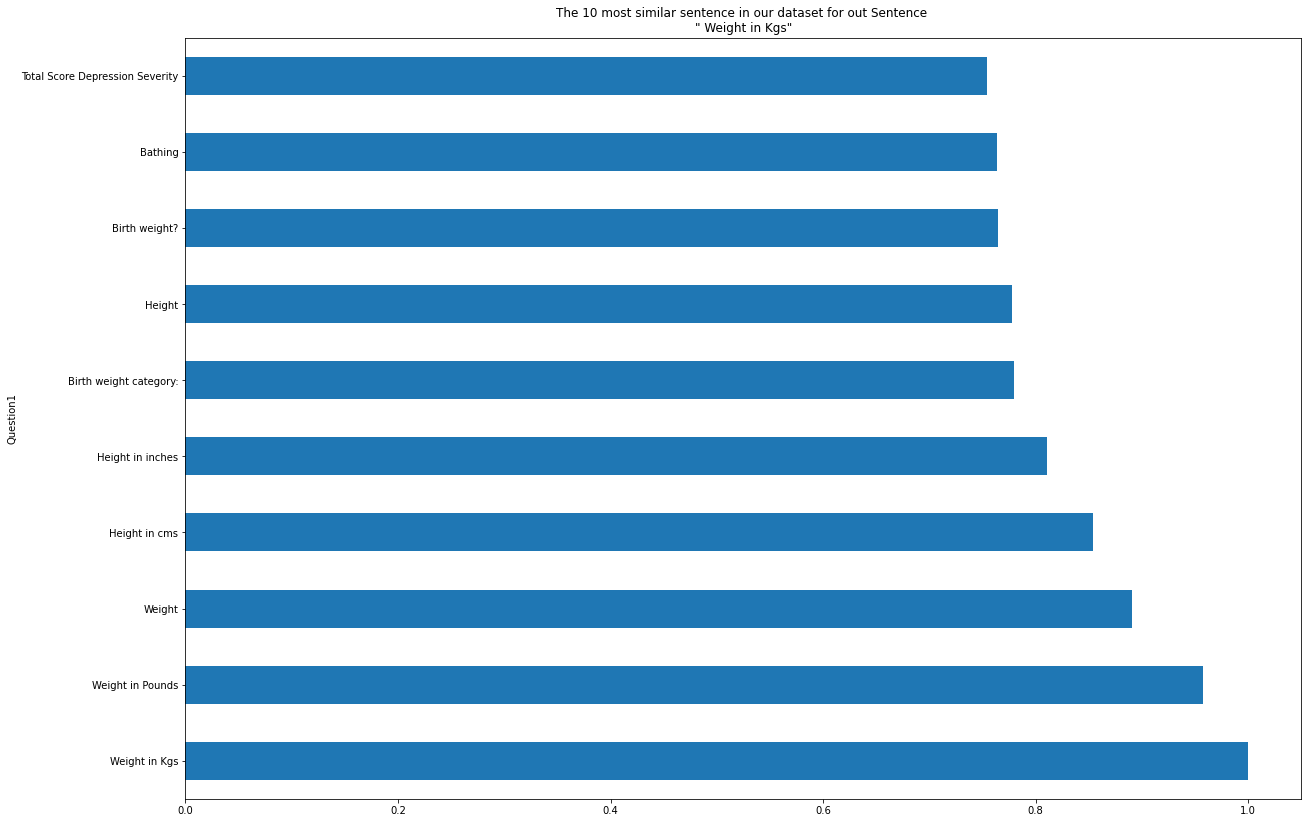

In [12]:
def sim_df_for_one_sent(sent_iloc=1109,N=10,sim_df_for_one_sent=sim_df_for_one_sent):
  sim_df_for_one_sent = get_sim_df_for_iloc(sent_iloc)
  
  sim_df_for_one_sent.index = sim_df_for_one_sent.Question1
  Sent = sim_df_for_one_sent.iloc[sent_iloc].Question1
  sim_df_for_one_sent.sort_values('sim_score',ascending=False).iloc[:N].sim_score.plot.barh(title = f'The {N} most similar sentence in our dataset for out Sentence \n" {Sent}"',figsize=(20,14))
  #ax.set_xlim(0.8,1)

sim_df_for_one_sent(1109)

In [13]:
def sim_df_total(predictions,e_col,string_to_embed,pipe=pipe):
  embed_mat = np.array([x for x in predictions[e_col]])
  sim_mat = cosine_similarity(embed_mat,embed_mat)
  for i,v in enumerate(sim_mat):
    s=predictions.iloc[i].document
    #predictions[v]=sim_mat[i]
    predictions[s]=sim_mat[i]

  return predictions
sim_matrix_df=sim_df_total(predictions,'sentence_embedding_bert','')
sim_matrix_df

,sentence_embedding_bert,text,document,"&nbsp;Medical reason(s): If any of the following apply, provide safety tips and escalate to <strong>RN</strong> for further evaluation","(IADL) Are you experiencing any limitations to your performing activities such as housekeeping, managing money, preparing meals, shopping, taking medications, using the telephone, transportation?","<P>Additional details regarding ""member refuses"" dilated eye exam: (select <STRONG>best</STRONG> response)</P>",<P>Colorectal cancer screening status:&nbsp; </P>,<P>Do you take your blood pressure medication as prescribed?</P>,"<P>Have you had a broken bone in the current calendar year? (excluding toes, fingers, face and skull fractures)</P>",<P>Member dilated eye exam status: </P>,<P>Select STARS measure gaps: (select only those that apply)</P>,<P>This member success story is being submitted on behalf of which <U>primary</U> <STRONG>Oncology</STRONG> program?</P>,<STRONG>For Diabetes Health Navigator USE ONLY:</STRONG> Select the correct level of care member was in when the&nbsp;flu vaccine&nbsp;gap was closed,<STRONG>For Diabetes Health Navigator use ONLY:</STRONG> Select the correct level of care member was in when the cholesterol lowering medication gap was closed,"<font size=""3""><strong>Management of Bladder Control:</strong></font> ""<em>Now I have some questions that can be sensitive about bladder control. This is an important health topic to talk about and I don't want you to feel uncomfortable at all."" </em>Duri","<font size=""3""><strong>Physical Activity in Older Adults:</strong></font> ""<em>Being able to move around every day with exercise or other physical activity is very important as we age. You should talk about this during doctor visits, or at least at your a","<p>Are you currently having any diabetes related issues (symptoms)?&nbsp; &nbsp;(i.e. shaking, sweating, dizziness, increased thirst, hunger, moodiness or frequent urination<em> not related to a fluid pill</em>)</p>",<p>Has your doctor ever told you that you have a heart condition(s)? </p><p><br></p><p><em>If member is unsure of the medical terminology or is hesitant please prompt by the example diagnosis below. </em></p><p><br></p><p> or any of the following? (,"<p>Provide fall prevention tips.<font color=""#ff0000""> <strong>(General Guidelines: Provide at least 3 safety tips and no more than 5, or as applicable, based on member's response)</strong></font></p><p><strong>Script:</strong> ""<u><strong>Falls put you a","<strong><font size=""3"">Fall Risk Management:</font></strong>&nbsp; ""<em>I'd like to talk about preventing falls with you. Falling is not a normal part of aging, so I want to talk about preventing that from happening to you</em>."" A fall is when your body","<strong><font size=""3"">Pneumonia Vaccine</font>:</strong> should be assessed on all members 65 years of age and older.<p></p><p>""I realize this may have already been discussed, but if you don't mind, I would like to ask:""</p><p></p><p><br></p><p></p><p>Ha",<strong>Nurse direction</strong>: Was ICUE medication tab updated with member's current medications and discharge medications?,<strong>Nurse direction</strong>: Were all discharge and current medications reviewed with member/responsible party?,ACE Inhibitor or ACE Alternative such as an ARB?,About how many times?,Actions taken for further CSP services: (check all that apply),Additional Right Care: (select all that apply),Additional opportunities: (select all that apply),Admit/Readmit Avoidance: (select all that apply),"After delivery, did your baby/babies need to be on a ventilator?","After nurse educating member on the COE network, what is the designation of the facility where the member will receive treatment?","Annual wellness visit/physical/checkup status<SPAN style=""POSITION: relative; LINE-HEIGHT: 115%; FONT-FAMILY: 'Georgia', 'serif'; FONT-SIZE: 10.5pt; TOP: 0.5pt; mso-fareast-font-family: Georgia; mso-bidi-font-family: Georgia; mso-ansi-languag

Similarities for Sentence : Height in inches


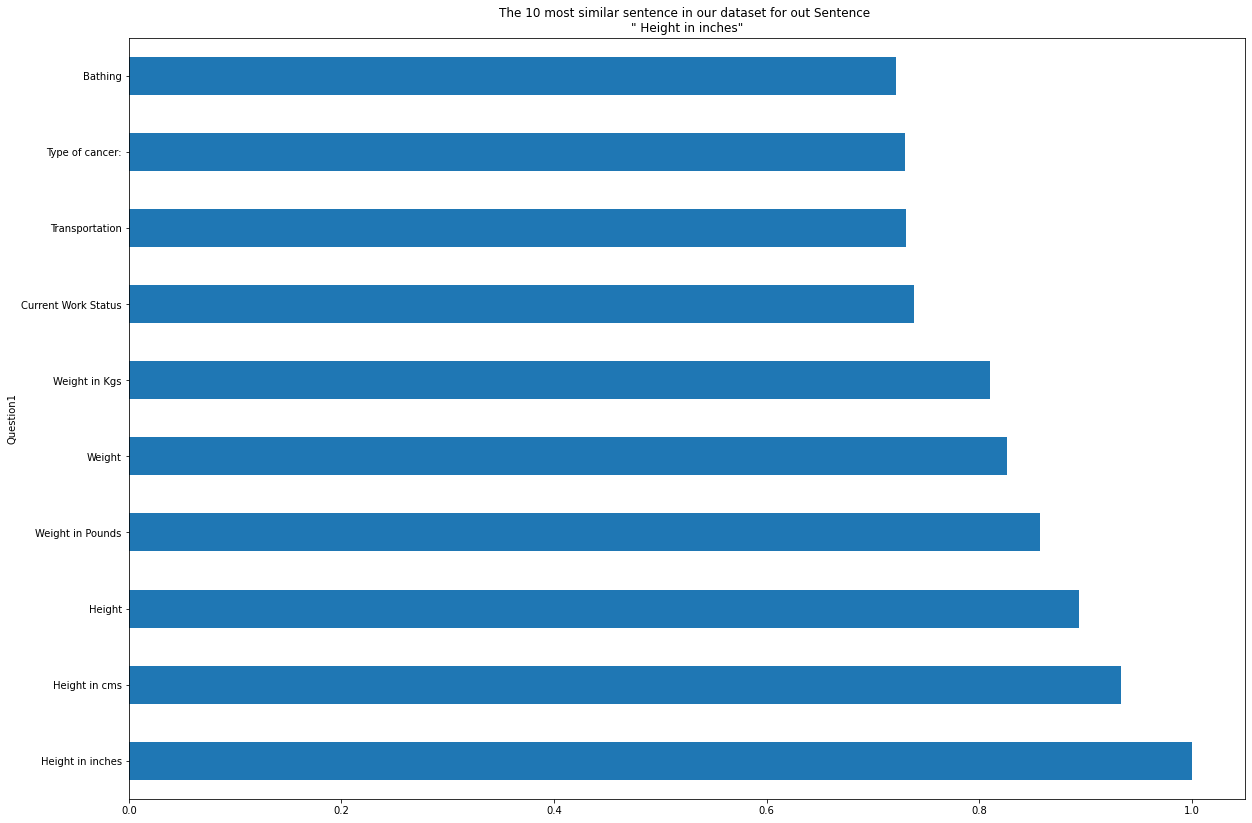

In [21]:
def sim_df_for_one_sent_tb(sent_iloc=1109,N=10,sim_df_for_one_sent=sim_df_for_one_sent):
  sim_df_for_one_sent_tb = get_sim_df_for_iloc(sent_iloc)
  
  sim_df_for_one_sent_tb.index = sim_df_for_one_sent.Question1
  Sent = sim_df_for_one_sent_tb.iloc[sent_iloc].Question1
  sim_df_for_one_sent_tb.sort_values('sim_score',ascending=False).iloc[:N].sim_score
sim_df_for_one_sent(1112)